In [4]:
#!pip install plotly
#!pip install -U scikit-learn
#!pip install pandas
#!pip install kaleido         # Para os graficos aparecerem como PNG no github

import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

base1 = pd.read_excel('Base-Dados-Desafio-D&A-01.xlsx')
base2 = pd.read_excel('Base-Dados-Desafio-D&A-01.xlsx', sheet_name = 1)
data_base = base1.merge(base2, how = 'left')

# O cliente com o id 4 esta repetido nos estados do Paraná e Santa Catarina,
# decidi deixar a base original e seguir com a análise.

resp1 = data_base.groupby(['ESTADO']).aggregate({'CLIENTE': 'nunique', 'IDADE': 'mean', 'QUANTIDADE_VENDIDA': 'sum'})
resp1 = resp1.rename(columns={'CLIENTE': 'QTDE_CLIENTES', 'IDADE': 'MEDIA_IDADE', 'QUANTIDADE_VENDIDA': 'SOMA_QTDE_VENDIDA'})
resp1 = resp1.sort_values(by='QTDE_CLIENTES', ascending=False)
display(round(resp1))

# Resposta 1:
# Os estados com mais clientes são Paraíba e Santa Catarina.
# A maior media de idade é de São Paulo e a menor do Rio Grande do Sul.
# Houve mais vendas em quantidades para Santa Catarina.

,QTDE_CLIENTES,MEDIA_IDADE,SOMA_QTDE_VENDIDA
ESTADO,,,
PARAÍBA,2,45.0,2046
SANTA CATARINA,2,46.0,2241
BAHIA,1,26.0,604
PARANÁ,1,43.0,855
RIO DE JANEIRO,1,58.0,1212
RIO GRANDE DO SUL,1,20.0,1258
SÃO PAULO,1,61.0,1502


,CATEGORIA,QUANTIDADE_VENDIDA
4,UTILIDADES DOMÉSTICAS,2372
1,LIMPEZA,2119
3,MAQUINA DE CORTAR GRAMA,1850
2,MANGUEIRAS,1844
0,JARDINAGEM,1533


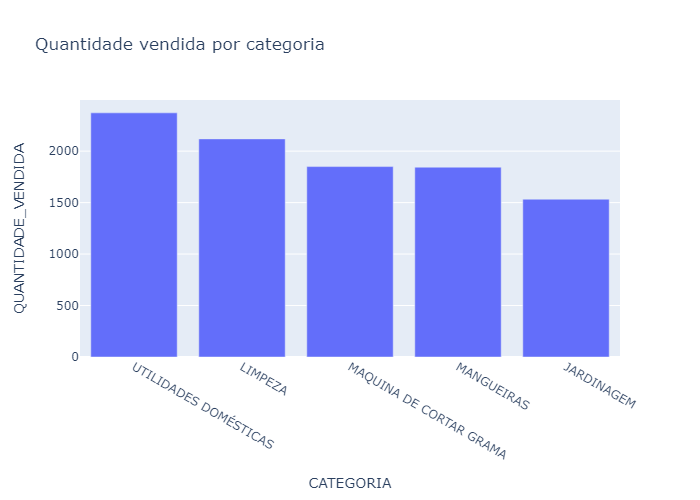

In [10]:
resp2 = data_base.groupby('CATEGORIA')['QUANTIDADE_VENDIDA'].sum().reset_index()
resp2 = resp2.sort_values(by='QUANTIDADE_VENDIDA', ascending=False)
display(resp2)
r2 = px.bar(resp2, x='CATEGORIA', y='QUANTIDADE_VENDIDA', title = "Quantidade vendida por categoria")
r2.show('png')

# Resposta 2:
# A categoria mais vendida foi utilidades domésticas.
# A menos vendida foi jardinagem.

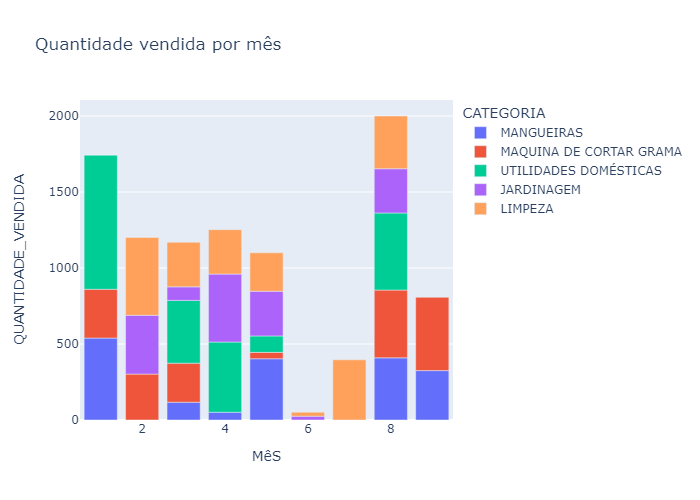

In [13]:
data_base['MêS'] = data_base['DATA'].dt.month
resp3 = data_base.groupby(['MêS', 'CATEGORIA'])['QUANTIDADE_VENDIDA'].sum().reset_index()
r3 = px.bar(resp3, x='MêS', y='QUANTIDADE_VENDIDA', color = 'CATEGORIA', title= 'Quantidade vendida por mês')
r3.show('png')

# Resposta 3:
# No primeiro semestre do ano, as vendas são mais estabilizadas, com poucas variações. Já no segundo semestre, acontece
# variações mais expressivas.
# Informações do ano de 2021.

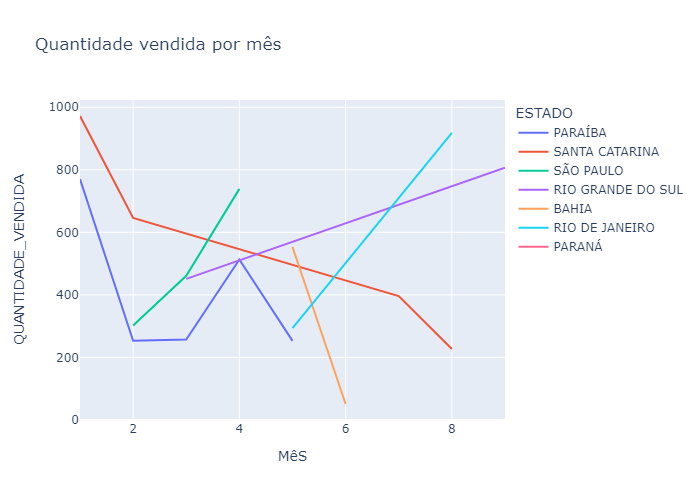

In [14]:
resp4 = data_base.groupby(['MêS', 'ESTADO'])['QUANTIDADE_VENDIDA'].sum().reset_index()
r4 = px.line(resp4, x='MêS', y='QUANTIDADE_VENDIDA', color = 'ESTADO', title = 'Quantidade vendida por mês')
r4.show('png')

# Resposta 4:
# Estados com tendência de alta: São Paulo, Rio Grande do Sul e Rio de Janeiro.
# Estados com tendência de baixa: Santa Catarina e Bahia.
# Estados neutros: Paraíba e Paraná. (O estado do Paraná não aparece no gráfico pois seu valor é muito pequeno).

In [8]:
codificador = LabelEncoder()

correlacao = data_base.drop(['CLIENTE', 'ESTADO', 'PRODUTO', 'QUANTIDADE_VENDIDA', 'DATA', 'MêS'], axis = 1)
correlacao['CATEGORIA'] = codificador.fit_transform(correlacao['CATEGORIA'])
# Transformando cada categoria de produto em um numero distinto, para conseguir fazer a correlação entre as variáveis.

correlacao.corr()

# Existe uma correlação negativa entre IDADE e CATEGORIA. Abaixo temos um gráfico aberto por cada categoria.

,IDADE,CATEGORIA
IDADE,1.000000,-0.051858
CATEGORIA,-0.051858,1.000000


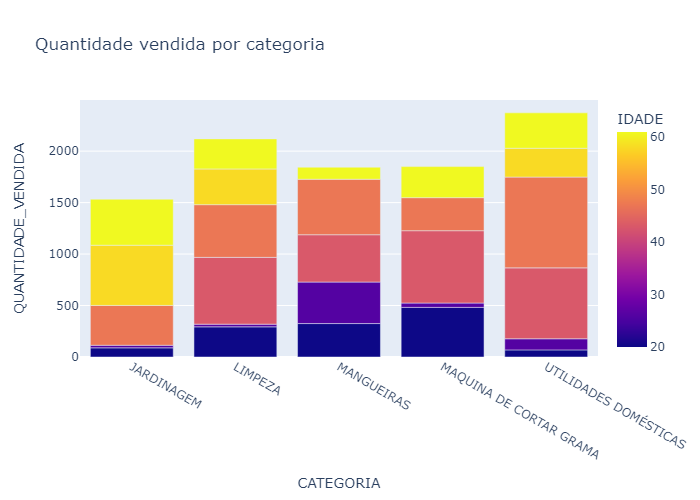

In [15]:
resp5 = data_base.groupby(['IDADE', 'CATEGORIA'])['QUANTIDADE_VENDIDA'].sum().reset_index()
r5 = px.bar(resp5, x='CATEGORIA', y='QUANTIDADE_VENDIDA', color='IDADE', title = 'Quantidade vendida por categoria')
r5.show('png')

# Resposta 5:
# O que chama mais atenção, são os clientes com idade entre 45 e 50 anos, esse grupo compra mais utilidades domésticas.
# Para a categoria de maquinas de cortar grama, a faixa etaria dos clientes com maior fatia, está entre 40 e 45 anos.






# Desenvolvido por Rafael de Aguida da Silva - 19/08/2023